In [1]:
#Importing Library
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
#Reading Dataset from csv file
df = pd.read_csv('Latest Covid-19 India Status.csv')

In [3]:
#view first 5 rows
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


In [4]:
#view last 5 rows
df.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
31,Sikkim,21573,1975,19287,311,9.15,89.40,1.44
32,Ladakh,20143,183,19756,204,0.91,98.08,1.01
33,Dadra and Nagar Haveli and Daman and Diu,10576,38,10534,4,0.36,99.60,0.04
34,Lakshadweep,9965,246,9670,49,2.47,97.04,0.49
35,Andaman and Nicobar,7491,14,7349,128,0.19,98.10,1.71


In [5]:
#Shape of Data
df.shape

(36, 8)

In [6]:
#Checking NUll Values in columns
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [7]:
#Info From Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [8]:
#Renaming Columns
df.columns = ['State', 'Total_Cases', 'Active', 'Discharged', 'Deaths', 'Active_Ratio', 'Discharge_Ratio', 'Death_Ratio']

In [9]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


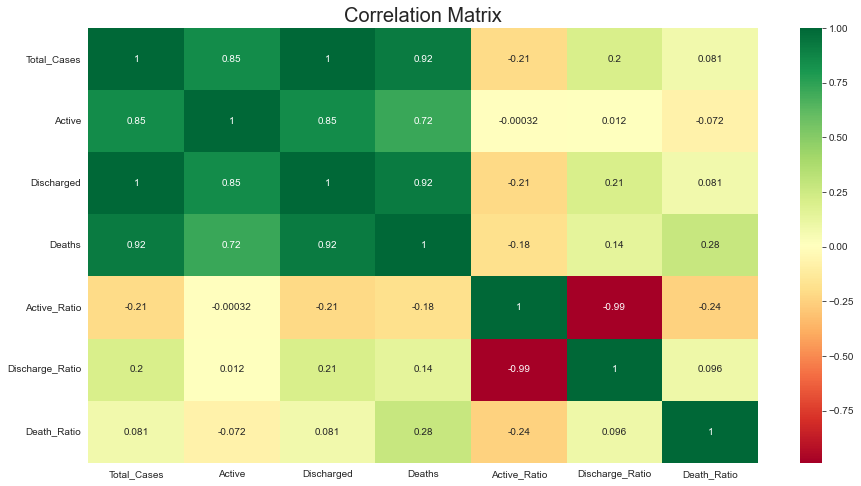

In [17]:
#Correlation using HeatMap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')
plt.title('Correlation Matrix', fontsize=20);

# Active Ratio in different States

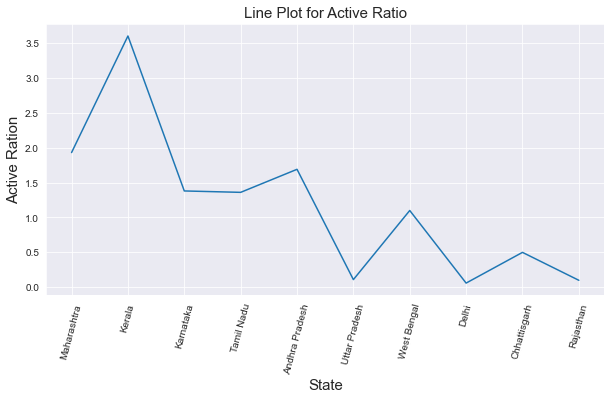

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(y='Active_Ratio', data=df.head(10), x='State')
plt.xticks(rotation=75)
plt.xlabel('State', fontsize=15)
plt.ylabel('Active Ration', fontsize=15)
plt.title("Line Plot for Active Ratio",fontsize=15);

In [19]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


In [20]:
#Total Cases in State
total_cases_state = df.groupby('State')['Total_Cases'].sum().sort_values(ascending=False)

# Total Cases in Each State

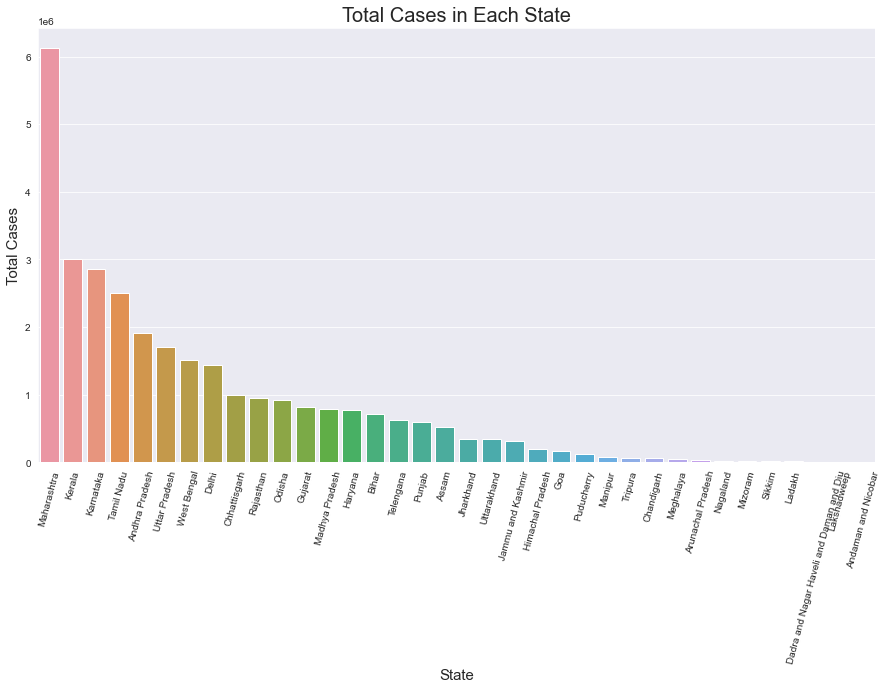

In [21]:
plt.figure(figsize=(15, 8));
plt.xticks(rotation=75)
sns.barplot(total_cases_state.index, total_cases_state);
plt.title('Total Cases in Each State', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Cases', fontsize=15);

# Top 10 States having Highest Cases

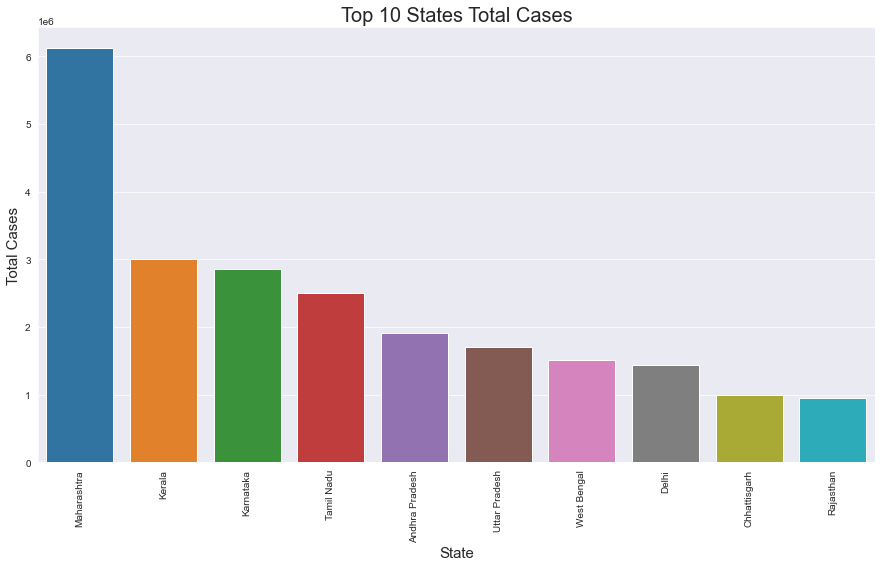

In [22]:
top_10 = total_cases_state[:10]
plt.figure(figsize=(15, 8));
plt.xticks(rotation=90)
sns.barplot(top_10.index, top_10);
plt.title('Top 10 States Total Cases', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Cases', fontsize=15);

# Total Cases in Different States using Point Plot

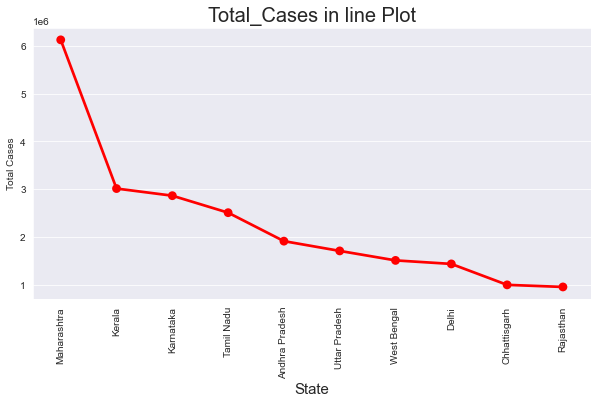

In [23]:
plt.figure(figsize=(10,5))
sns.pointplot(x='State',y='Total_Cases',data=df.head(10), color='red')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Cases')
plt.title("Total_Cases in line Plot",fontsize=20);

# Plotting Distribution of Death, Active and Discharged Cases

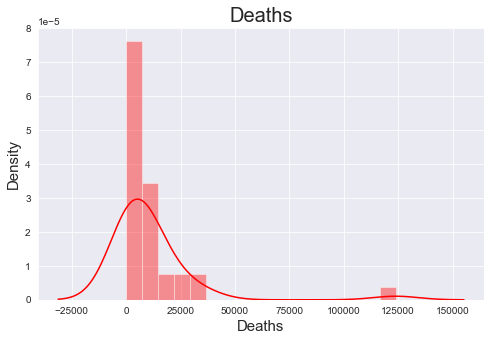

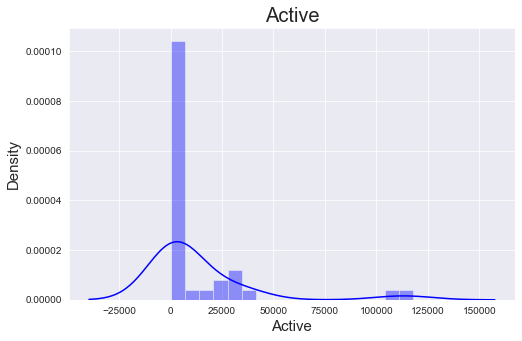

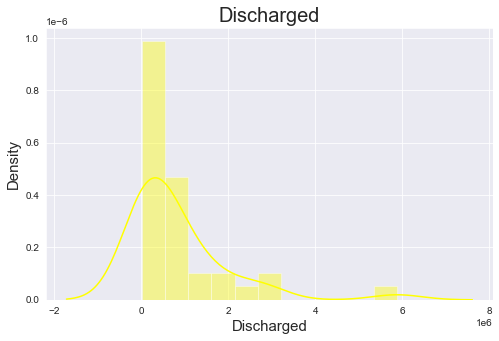

In [24]:
for column in ['Deaths', 'Active', 'Discharged']:
    plt.figure(figsize=(8, 5))
    if column == 'Deaths':
        sns.distplot(df[column], color='Red')
        plt.title(column, fontsize=20);
        plt.xlabel('Deaths', fontsize=15)
        plt.ylabel('Density', fontsize=15);\
        
    elif column  == 'Active':
        sns.distplot(df[column], color='Blue')
        plt.title(column, fontsize=20);
        plt.xlabel('Active', fontsize=15)
        plt.ylabel('Density', fontsize=15);
        
    else:
        sns.distplot(df[column], color='Yellow')
        plt.title(column, fontsize=20);
        plt.xlabel('Discharged', fontsize=15)
        plt.ylabel('Density', fontsize=15);

# Active Cases in Top 5 States in India

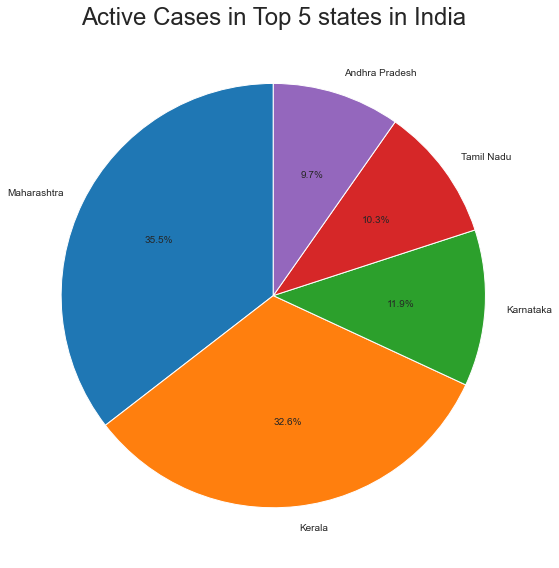

In [25]:
plt.figure(figsize=(8,8))
labels = df.index
plt.pie(x='Active', data=df.head(), labels='State',startangle=90,autopct='%.1f%%')
plt.title("Active Cases in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

# Total Cases in Top 5 States in India

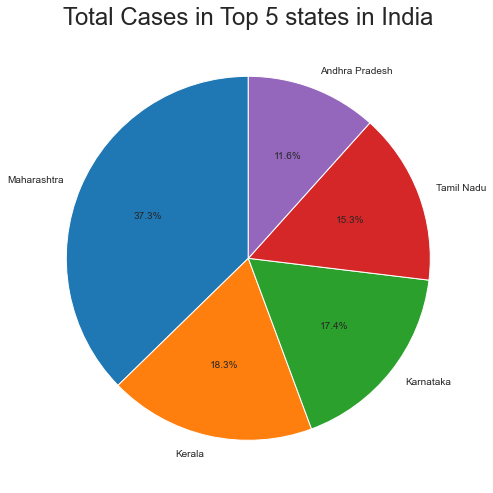

In [19]:
plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Total_Cases', data=df.head(), labels='State', startangle=90,autopct='%.1f%%')
plt.title("Total Cases in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

# People Discharged in Top 5 States in India 

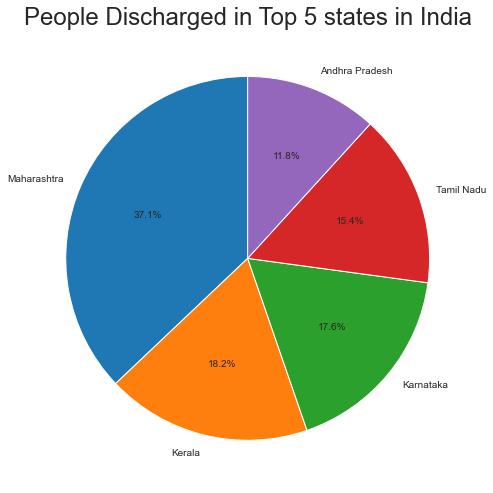

In [36]:
plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Discharged', data=df.head(), labels='State', startangle=90,autopct='%.1f%%')
plt.title("People Discharged in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

# Death in Top 5 States in India

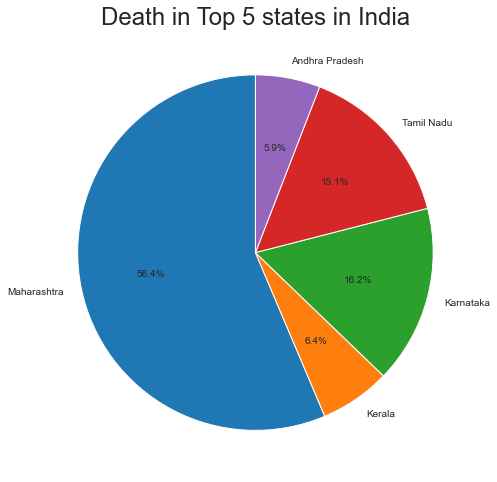

In [37]:
plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Deaths', data=df.head(), labels='State', startangle=90,autopct='%.1f%%')
plt.title("Deaths in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

# Detecting Outliers of Continous Features

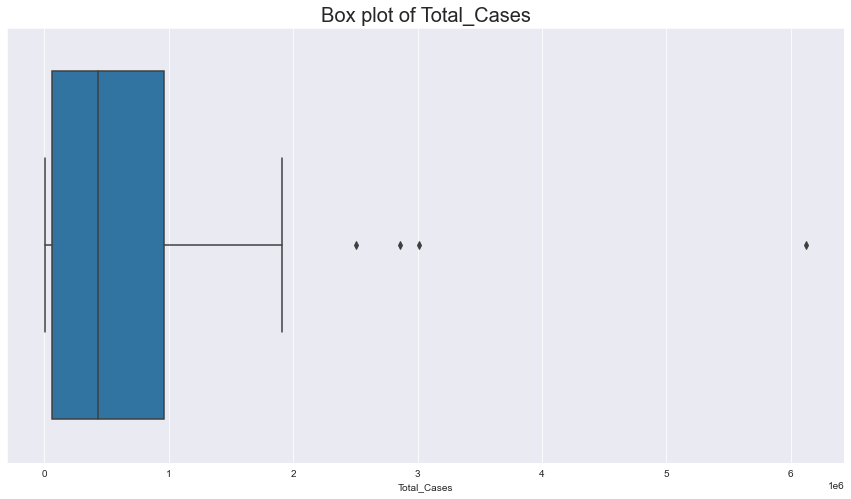

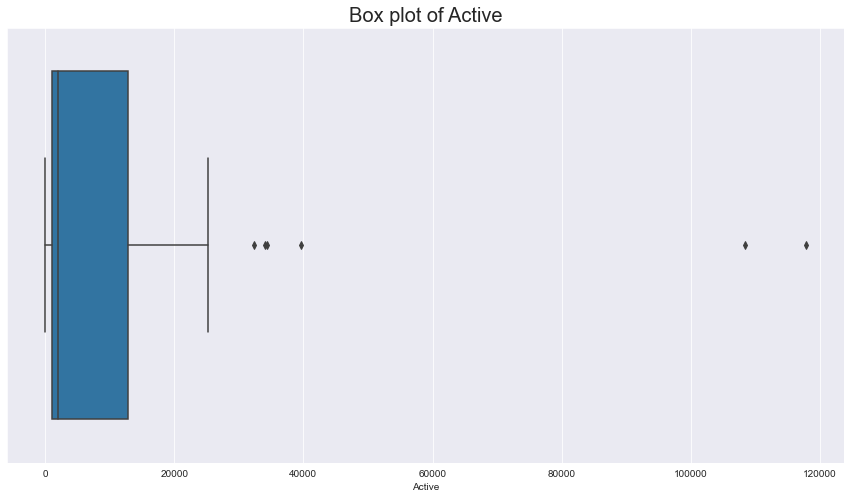

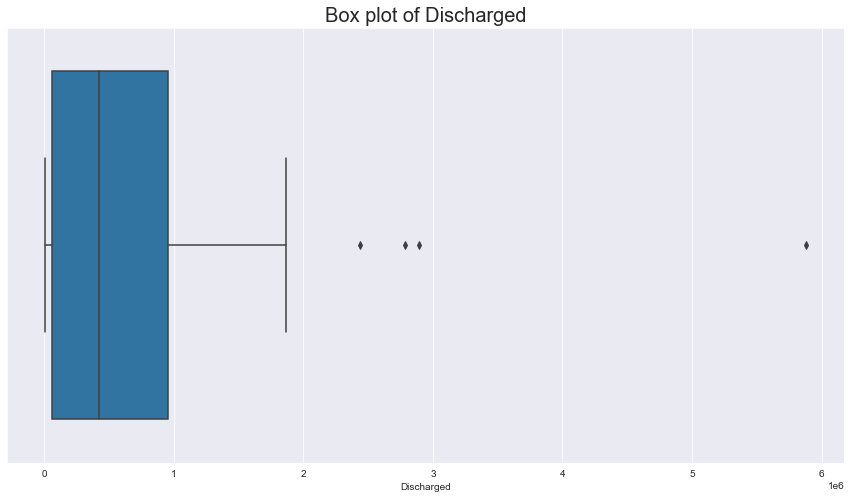

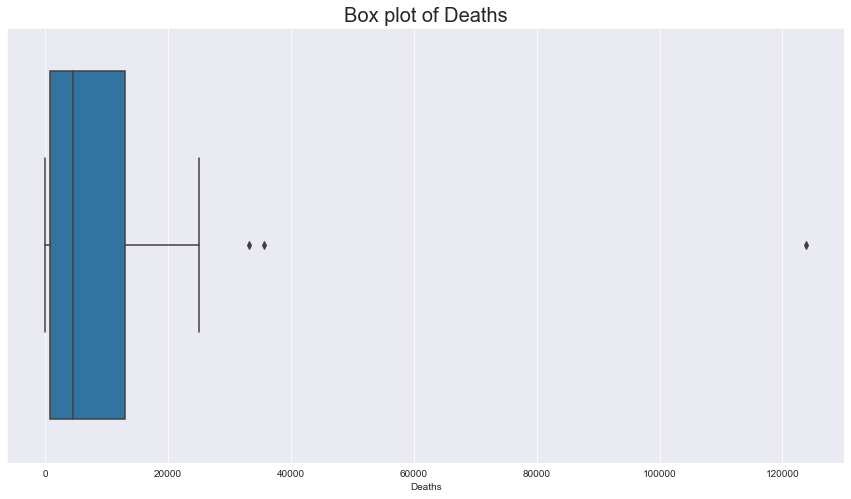

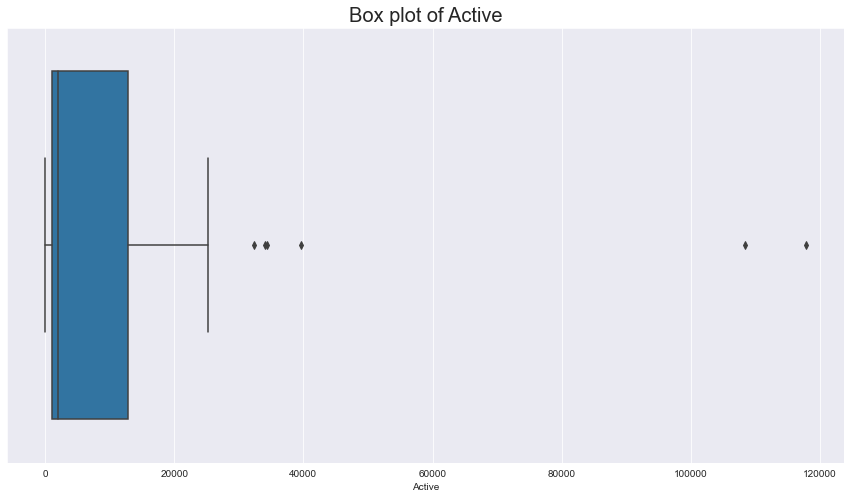

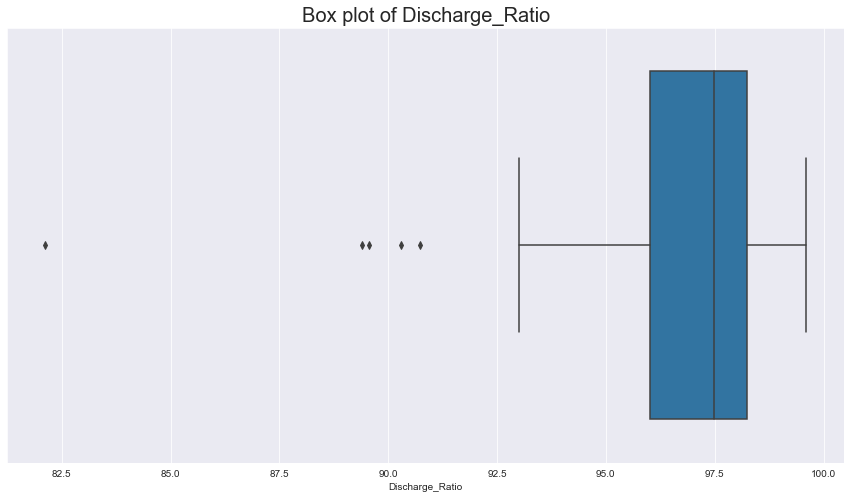

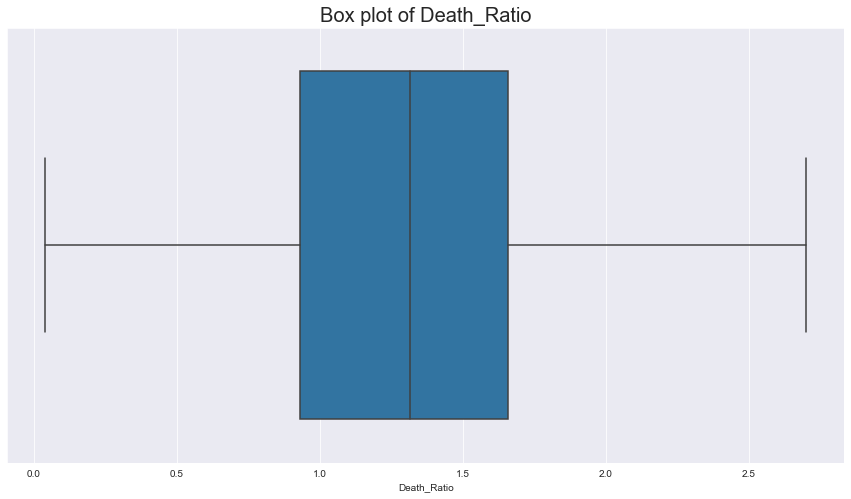

In [26]:
for column in ['Total_Cases', 'Active', 'Discharged', 'Deaths', 'Active', 'Discharge_Ratio', 'Death_Ratio']:
    plt.figure(figsize=(15, 8))
    sns.boxplot(df[column])
    plt.title("Box plot of {}".format(column), fontsize=20);

# Recovered Cases

In [27]:
#Recovered Cases
recovered_cases = df['Total_Cases'] - (df['Active'] + df['Deaths'])
#Adding recovered cases to df
df['Recovered_Cases'] = recovered_cases

In [28]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Recovered_Cases
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02,5881167
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47,2889186
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24,2787111
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32,2439576
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68,1865956


# Recovered Cases in different States

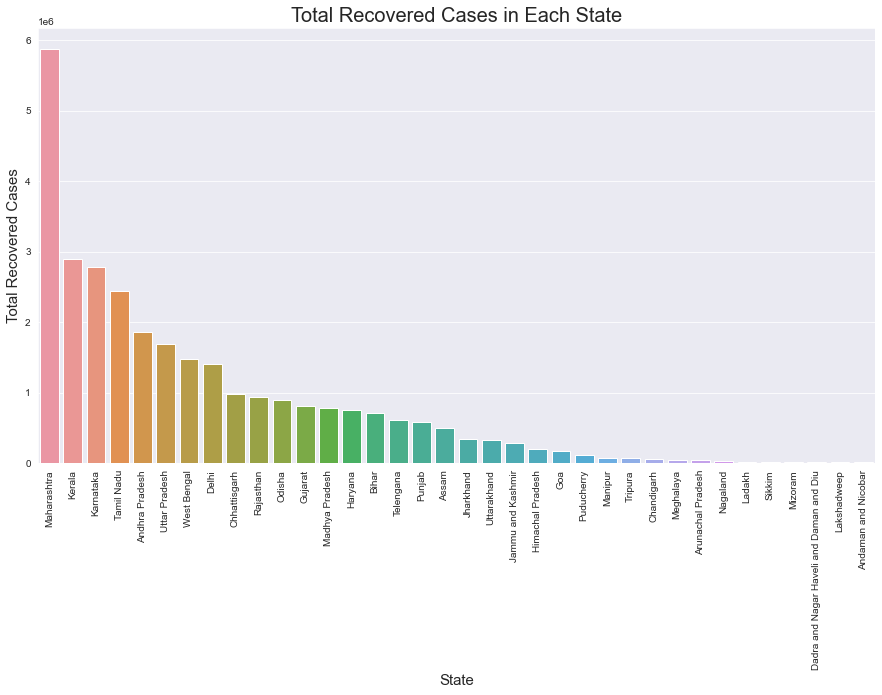

In [30]:
rec_cases = df.groupby('State')['Recovered_Cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8));
plt.xticks(rotation=90)
sns.barplot(rec_cases.index, rec_cases);
plt.title('Total Recovered Cases in Each State', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Recovered Cases', fontsize=15);

# Top 10 Recovered States

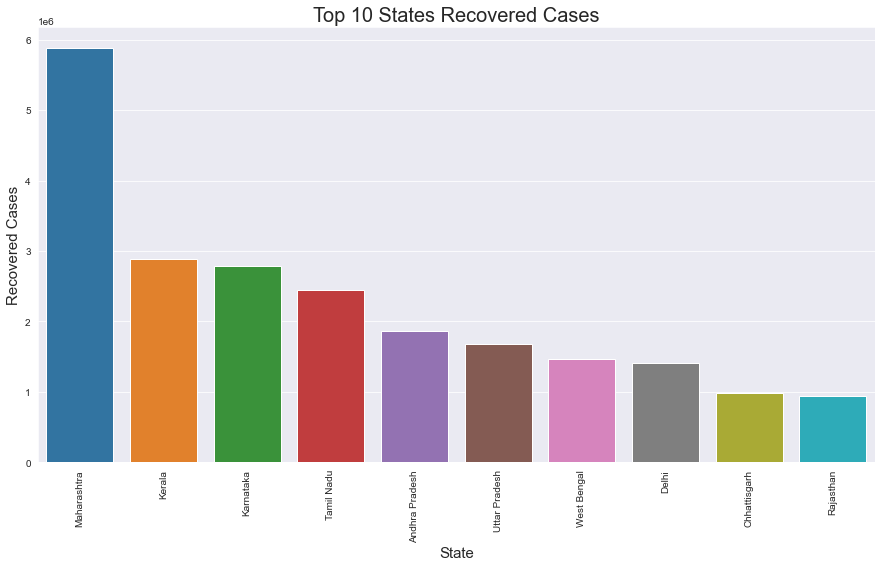

In [31]:
rec_cases = rec_cases[:10]
plt.figure(figsize=(15, 8));
plt.xticks(rotation=90)
sns.barplot(rec_cases.index, rec_cases);
plt.title('Top 10 States Recovered Cases', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Recovered Cases', fontsize=15);

# point plot of recovered Cases

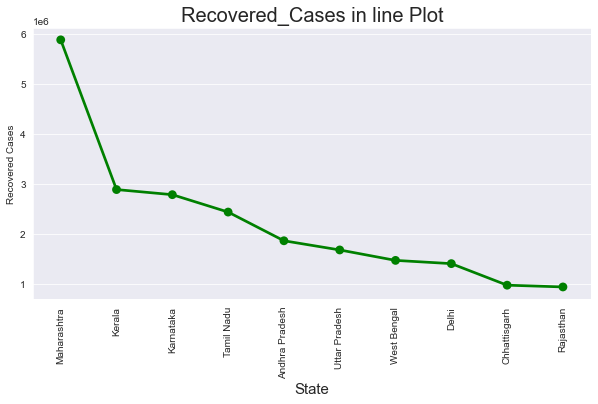

In [32]:
plt.figure(figsize=(10,5))
sns.pointplot(x='State',y='Recovered_Cases',data=df.head(10), color='green')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=15)
plt.ylabel('Recovered Cases')
plt.title("Recovered_Cases in line Plot",fontsize=20);

# Bivariate Analysis between recovered cases and States

<Figure size 1080x576 with 0 Axes>

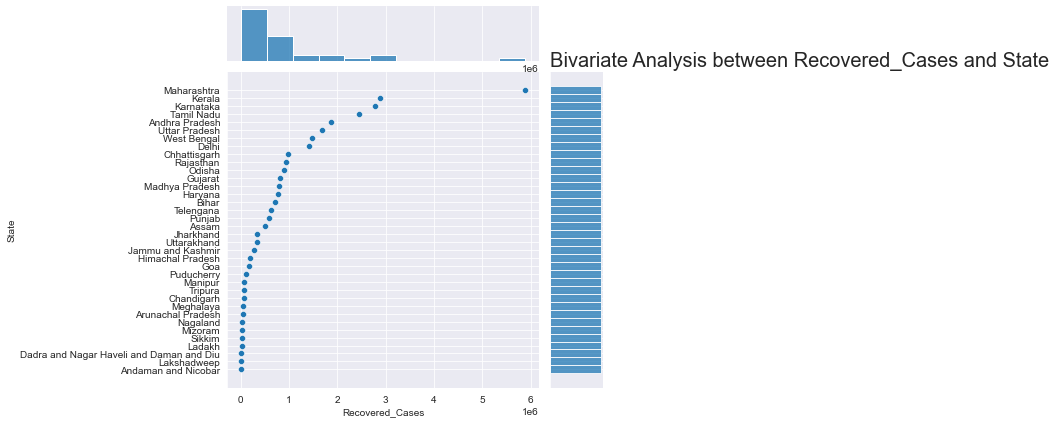

In [26]:
plt.figure(figsize=(15, 8));
sns.jointplot(x='Recovered_Cases',y='State', data=df);
plt.xticks(rotation=90);
plt.xlabel('Recovered Cases', fontsize=15);
plt.ylabel('State', fontsize=15);
plt.title('Bivariate Analysis between {} and {}'.format('Recovered_Cases', 'State'), fontsize=20, loc='left');

<Figure size 1080x576 with 0 Axes>

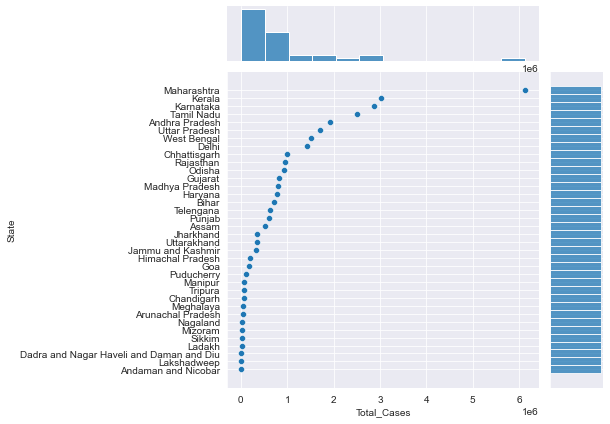

In [27]:
''' Bivariate Analysis between Total Cases and State'''
plt.figure(figsize=(15, 8));
sns.jointplot(x='Total_Cases',y='State', data=df);
plt.xticks(rotation=90);
plt.xlabel('Total Cases', fontsize=15);
plt.ylabel('State', fontsize=15);

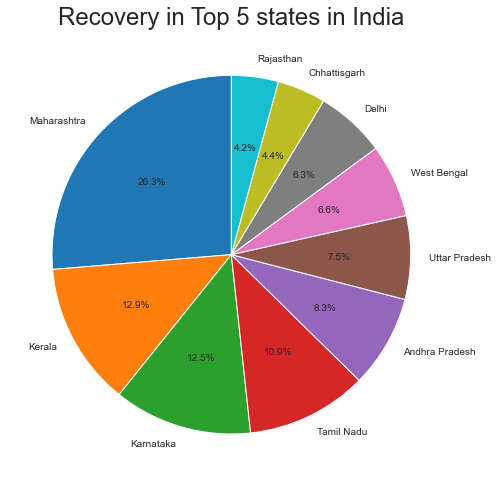

In [40]:
plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Recovered_Cases', data=df[:10], labels='State', startangle=90,autopct='%.1f%%')
plt.title("Recovery in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

# Summary

# 1. Maharashtra has been affected the most in India.
# 2. Kerela stands the second followed by Karnataka 
# 3. Rajashthan has the best discharge ratio 
# 4. Discharge to Active Ratio is highest in Kerela followed by Karnataka. 
# 5. Death ratio is highest in Maharashtra and Chattisgarh.
# 6. Most Active Ratio is in Kerela and least is in Delhi and Uttar Pradesh 
# 7. Recovery is also highest in Maharashtra, Kerala and Karnataka stands at 2nd and 3rd respectively